## Observations and Insights 

1. For Capomulin, the correlation coefficient between average Mouse Weight & Tumor Volume is: 0.84, and therefore we can determine there is a positive correlation between them. When average mouse weight increases, so does the average tumor volume.

2. After calculating the average tumor volume for all drug treatments, it seems that Capomulin and Ramicane are the most successful at treamtment (i.e. reduction of average tumor volume).

3. The results from this study can be deemed reliable and consistent as there was only 1 outlier found in the top 4 drug treatments, including zero outliers for the 2 most effective drugs, Capomulin and Ramicane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = df.loc[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.loc[df['Mouse ID'] != 'g989']
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimens_avg = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimens_med = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimens_var = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimens_std = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimens_sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

regimens_summary = pd.DataFrame({"Mean": regimens_avg,
                                 "Median": regimens_med,
                                 "Variance": regimens_var,
                                 "Standard Deviation": regimens_std,
                                 "Standard Error": regimens_sem
                        })
regimens_summary

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median',
                                                                    'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
bar1 = df['Drug Regimen'].value_counts()
len(bar1)

10

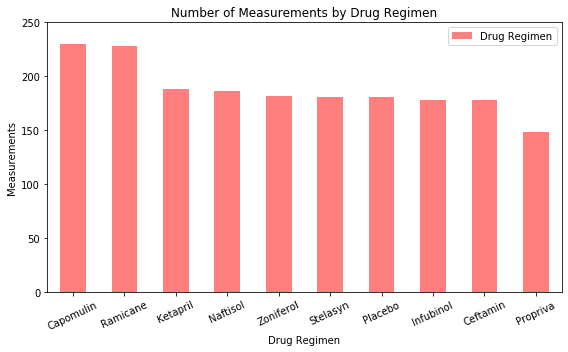

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

data = df['Drug Regimen'].value_counts()
bar1 = data.plot(kind = 'bar', title = 'Number of Measurements by Drug Regimen',
                 rot = 25, figsize = (8,5), legend = True,
                 xlim = ([-0.75, len(data)]),
                 ylim = ([0, max(data.values)+20]),
                 facecolor = 'red', alpha = 0.5)
bar1.set_xlabel('Drug Regimen')
bar1.set_ylabel('Measurements')
plt.tight_layout()
plt.show()

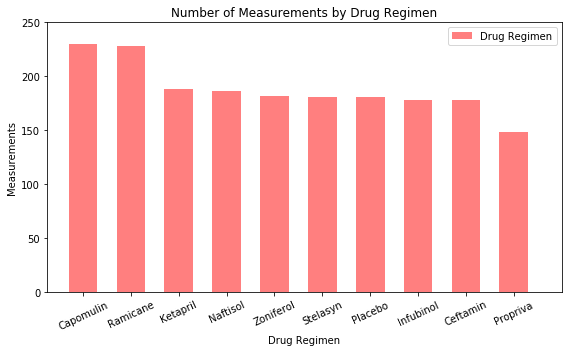

In [148]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = data.index
y_axis = data.values
plt.figure(figsize=(8,5))

plt.bar(x_axis, y_axis, width = 0.6, color='red', alpha=0.5, label='Drug Regimen')

plt.title('Number of Measurements by Drug Regimen')
plt.xticks(rotation = 25)
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.xlim(-0.75, len(data))
plt.ylim(0, max(data.values)+20)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [12]:
data2 = df['Sex'].value_counts()
data2

Male      958
Female    922
Name: Sex, dtype: int64

In [13]:
data2.index

Index(['Male', 'Female'], dtype='object')

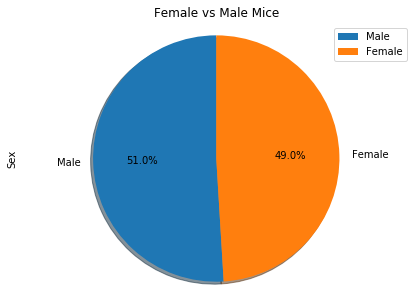

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

data2 = df['Sex'].value_counts()
labels = data2.index
gender = data2.values
pie1 = data2.plot(kind = 'pie', y = gender, labels = labels, title = 'Female vs Male Mice',
                 shadow = True, startangle=90, figsize=(7,5), autopct='%1.1f%%', legend = True)
plt.axis("equal")
plt.show()

In [23]:
data2.values

array([958, 922])

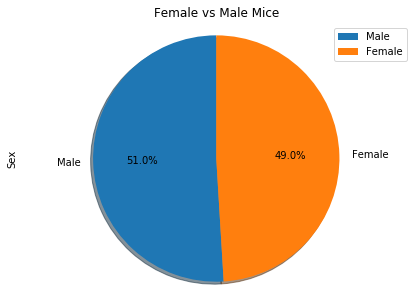

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = data2.index
gender = data2.values
explode = [0, 0]
plt.figure(figsize=(7,5))
plt.title("Female vs Male Mice")
plt.pie(gender, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.ylabel('Sex')
plt.legend(loc="best")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
max_times = df.groupby('Mouse ID', as_index = False)['Timepoint'].max()
max_times

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times = df.groupby('Mouse ID', as_index = False)['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df2 = max_times.merge(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in drugs:
    drug_df2 = df2.loc[df2['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(drug_df2)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df2.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {drug}: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f"For {drug}, values above {upper_bound} could be outliers.\n")

IQR for Capomulin: 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers.
For Capomulin, values above 51.83201549 could be outliers.

IQR for Ramicane: 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers.
For Ramicane, values above 54.30681135 could be outliers.

IQR for Infubinol: 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers.
For Infubinol, values above 82.74144559000001 could be outliers.

IQR for Ceftamin: 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers.
For Ceftamin, values above 87.66645829999999 could be outliers.



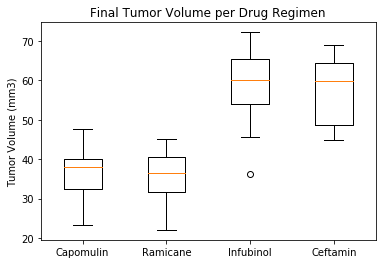

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Drug Regimen')
ax.set_xticklabels(drugs)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

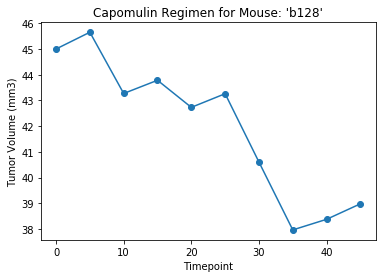

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

single_mouse = df.loc[df["Mouse ID"] == "b128",:]

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen for Mouse: 'b128'")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

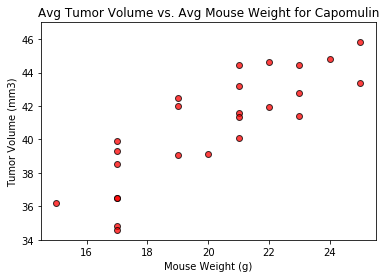

In [145]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen = df.loc[df["Drug Regimen"] == "Capomulin",:]
cap_averages = cap_regimen.groupby(['Mouse ID']).mean()

avg_mouse_weight = cap_averages['Weight (g)']
avg_tumor_vol = cap_averages['Tumor Volume (mm3)']

plt.scatter(avg_mouse_weight,avg_tumor_vol, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(34,47)
plt.show()

## Correlation and Regression

The correlation coefficient between average Mouse Weight & Tumor Volume for Capomulin is: 0.84


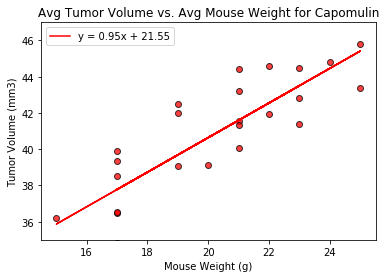

The linear regression equation is: y = 0.95x + 21.55.


In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_mouse_weight,avg_tumor_vol)
print(f"The correlation coefficient between average Mouse Weight & Tumor Volume for Capomulin is: {round(correlation[0],2)}")

x_values = avg_mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression model on top of scatter from above
plt.scatter(avg_mouse_weight,avg_tumor_vol, marker="o", facecolors="red",
            edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(34,47)
plt.legend(loc="best")
plt.show()
print(f"The linear regression equation is: {line_eq}.")